In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
class Neuron:
    def __init__(self, potential, reset_potential=-1):
        self.reset_potential = reset_potential
        self.potential = potential
        self.spiking = np.random.rand() > 0.5
        self.nspikes = int(self.spiking)
        if self.spiking: self.potential = reset_potential

In [4]:
class Network:
    def __init__(self, N=60, std = 1, asymmetric = True, symmetric = False):
        self.N = N
        self.neurons = []
        if asymmetric:
            self.M = self.init_connectivity_matrix(std, 1) # evolving connectivity matrix M
        elif symmetric:
            self.M = self.init_connectivity_matrix(std, 2)
             
        
        
    def init_connectivity_matrix(self, std, type):
        
        if type == 1:
            M = np.random.rand(self.N, self.N)
            
            # Set diagonal elements to zero
            np.fill_diagonal(M, 0)
            
            # Make the matrix antisymmetric
            for i in range(self.N):
                for j in range(i + 1, self.N):
                    M[i, j] = -M[j, i]
                    
            M = M / np.sum(M)
                    
        if type == 2:
            
            M = np.random.normal(loc=0, scale=std, size=(self.N, self.N))
    
            # Set diagonal elements to zero
            np.fill_diagonal(M, 0)
        
        
                    
        eigenvalues = np.linalg.eigvals(M)
        plt.plot(np.real(eigenvalues), np.imag(eigenvalues), 'bo')
        plt.title('Eigenvalues of Matrix J')
        plt.xlabel('Real')
        plt.ylabel('Imaginary')
        plt.grid(True)
        plt.show()
        
        return M


    
    def init_neurons(self):
        for _ in range(self.N):
            potential = 2*np.random.rand()-1
            self.neurons.append(Neuron(potential))
            
    def simulate(self, iterations, spike_input=0.5, input_noise = 0.1, leak=0.01, spike_threshold = 1, REST=-1):
        spiking_activity = []
        V_list = []
        
        V = [neuron.potential for neuron in self.neurons]
        spikes = [neuron.spiking for neuron in self.neurons]
        
        
        for _ in range(iterations):
            # Updating V (potential) and determining which neurons spiked
            V = np.array(V) + spike_input*np.dot(self.M, spikes) + input_noise * np.random.rand(self.N) - leak * np.array(V)
            spikes = (V >= spike_threshold)
            V[spikes] = REST
            V[V < REST] = REST

            # Updating neuron object attributes for neurons in network
            for i, neuron in enumerate(self.neurons):
                neuron.spiking = spikes[i]
                neuron.potential = V[i]
                neuron.spiking = False
                
            V_list.append(V.copy())
            spiking_activity.append(spikes.copy())
        
        return spiking_activity, V_list
    
    
    def plot_activity(self, spiking_activity, V_list):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(np.array(spiking_activity).T, aspect='auto', cmap='binary')
        plt.xlabel('Time')
        plt.ylabel('Neuron Index')
        plt.title('Neuron Firings Over Time')
        plt.subplot(1, 2, 2)
        plt.imshow(np.array(V_list).T, aspect='auto', cmap='seismic')
        plt.xlabel('Time')
        plt.ylabel('Neuron index')
        plt.title('Membrane Potential Over Time')
        plt.colorbar(label='Membrane Potential')
        plt.tight_layout()
        plt.show()

In [5]:
network = Network(N=100)
network.init_neurons()
spiking_activity, V_list = network.simulate(iterations = 1000, spike_input= 0.1, input_noise = 0.05)
#network.plot_eigenvalues()
network.plot_activity(spiking_activity, V_list)

C:\Users\absolute-zero\AppData\Local\Temp\ipykernel_14620\1524180780.py:25: RuntimeWarning: divide by zero encountered in divide
  M = M / np.sum(M)
C:\Users\absolute-zero\AppData\Local\Temp\ipykernel_14620\1524180780.py:25: RuntimeWarning: invalid value encountered in divide
  M = M / np.sum(M)


LinAlgError: Array must not contain infs or NaNs

The code above runs an antisymmetric matrix of N = 100, where the input wieght for spiking is 2 (a neuron assuredly causes a spike to neurons its connected to)

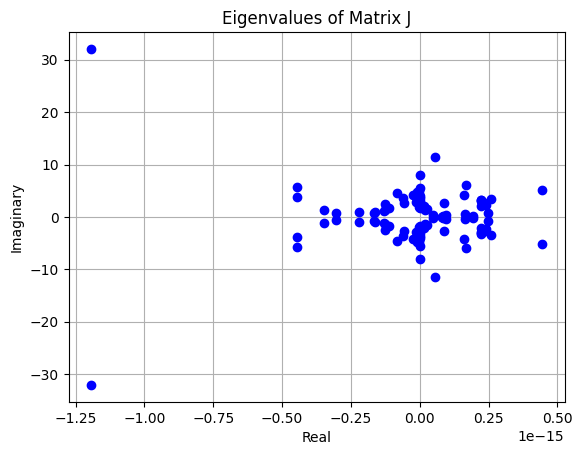

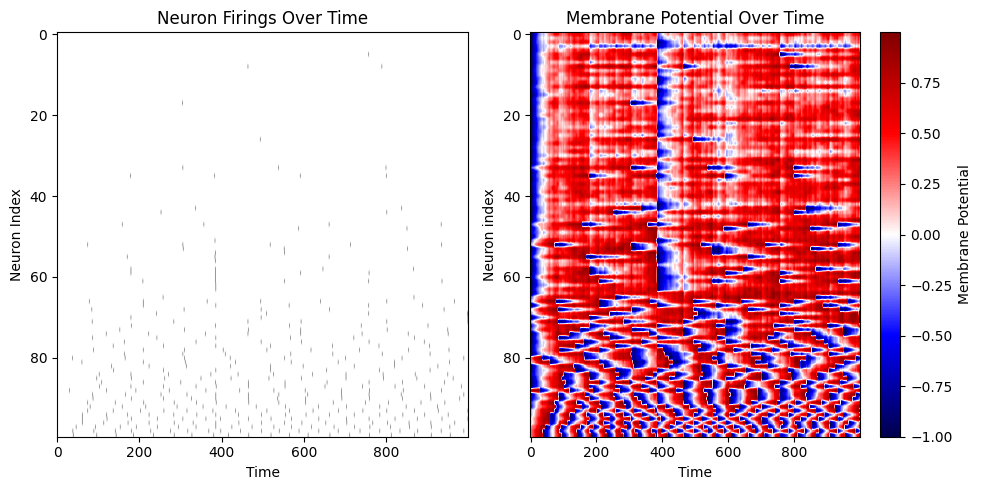

In [51]:
network = Network(N=100, symmetric= True, std=1)
network.init_neurons()
spiking_activity, V_list = network.simulate(iterations = 1000, spike_input=0.1, input_noise= 0.05)
network.plot_activity(spiking_activity, V_list)